<a href="https://colab.research.google.com/github/LH-1169213/ML/blob/main/TC4033_Activity2b_Team_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

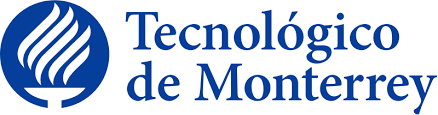

#**Master in Applied Artificial Intelligence**
##**Course: Advanced Machine Learning Methods**
###**Tecnológico de Monterrey**
###**Professor: José Antonio Cantoral Ceballos**

## **Activity 2b: Building a CNN for CIFAR10 Dataset with PyTorch**

###**Team 5:**

###**A01748750 - Evelyn Aylin Rendón Medina**
###**A01002111 - Luis Salvador Cruz Najera**
###**A01169213 - Laura Elena Hernández Mata**
###**A01793052 - Juan Carlos Lopez Cruz**

# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

## Content import and libraries

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt

#Libraries only if we use
#only if you have jupyterthemes
#from jupyterthemes import jtplot
#jtplot.style()

## Mounting google drive:

This code is to mount the google drive to storage the images.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Evaluation if GPU is avalaible

In [ ]:
torch.cuda.is_available()

True

## Download Cifar10 dataset

The following code is to download the Cifar10 data set.
DATA PATH is the data path to save the data, it would be saved in the google drive.

Transformation data change the Cifar10 data to Tensor and then Normilize the data using the mean and standard deviation, the values are known values that are common to normalize Cifrar10 data.

Dataloader is wrapping the data to allowing that each MINIBATCH includes random samples of all the clases in a random way.




In [ ]:
DATA_PATH = '/content/drive/MyDrive/11_AMLM/Modulo 2/Semana_4/Cifar10'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

# Transformation of the Data.
transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize(              ## These values are for normalize the data
                    [0.491, 0.482, 0.447], ## These values are the means for the data
                    [0.247, 0.243, 0.261]) , ## # These values are the standar deviation of the data.
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar) #Applies data transformation
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar) #Applies data transformation
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar) #Applies data transformation
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


### This instruction shows how the cifar10_train includes 50,000 data and where is located and what transform was applied.

In [ ]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/drive/MyDrive/11_AMLM/Modulo 2/Semana_4/Cifar10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

### This instruction show the batch size for train data set which matches with MINIBACH variable.

In [ ]:
train_loader.batch_size

64

### This cycle prints each element toch.tensor for the data set train_loader

In [ ]:
for i, (x, y) in enumerate(train_loader): #Loop that loads every element in the training dataset
    print(x, y)

Streaming output truncated to the last 5000 lines.
          ...,
          [-1.8926e+00, -1.8926e+00, -1.8767e+00,  ..., -1.9243e+00,
           -1.9243e+00, -1.9243e+00],
          [-1.8926e+00, -1.8926e+00, -1.8767e+00,  ..., -1.9243e+00,
           -1.9243e+00, -1.9243e+00],
          [-1.8767e+00, -1.8767e+00, -1.8767e+00,  ..., -1.9243e+00,
           -1.9243e+00, -1.9243e+00]],

         [[-1.8867e+00, -1.8867e+00, -1.8867e+00,  ..., -1.9028e+00,
           -1.9028e+00, -1.9028e+00],
          [-1.8867e+00, -1.8867e+00, -1.8867e+00,  ..., -1.9028e+00,
           -1.9028e+00, -1.9028e+00],
          [-1.8867e+00, -1.8867e+00, -1.8867e+00,  ..., -1.9028e+00,
           -1.9028e+00, -1.9028e+00],
          ...,
          [-1.8706e+00, -1.8867e+00, -1.8867e+00,  ..., -1.9028e+00,
           -1.9028e+00, -1.9028e+00],
          [-1.8706e+00, -1.8706e+00, -1.8706e+00,  ..., -1.9028e+00,
           -1.9028e+00, -1.9028e+00],
          [-1.8867e+00, -1.8867e+00, -1.8706e+00,  ..., -1.90

## Using  GPUs.

This code is meant to allocate memory for GPU usage if a GPU is available. It will be assigned to CUDA, but if a GPU is not available, it will be assigned to the CPU

In [ ]:
if torch.cuda.is_available(): #Checks if cuda from torch is available
    device = torch.device('cuda') #When CUDA from PyTorch is available, set it as the device
else: #Otherwise,
    device = torch.device('cpu') #Set “cpu” as the device
print(device) #To check the selected device

cuda


### Image preview.

This code is to plot a random image from the test dataset.

The image obtained randomly represents: horse


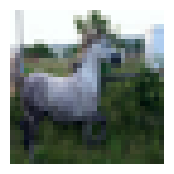

In [ ]:
classes = test_loader.dataset.classes #Create a variable that contains all the classes in the dataset
def plot_figure(image): #Function definition for plotting an image
    plt.figure(figsize=(2, 2)) #Set a specific image size
    plt.imshow(np.transpose(image,(1,2,0))) #Transposed image
    plt.axis('off') #Set the axis off

    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader)) #Declare a random selection
print(f'The image obtained randomly represents: {classes[test_loader.dataset[rnd_sample_idx][1]]}') #Index the same random selection to specify the correct category
image = test_loader.dataset[rnd_sample_idx][0] #Index the same random selection to show the same image
image = (image - image.min()) / (image.max() -image.min() )

plot_figure(image) #Finally, display the image with all the settings written before


One of the images dispayed in one of the executions is the one that follows:
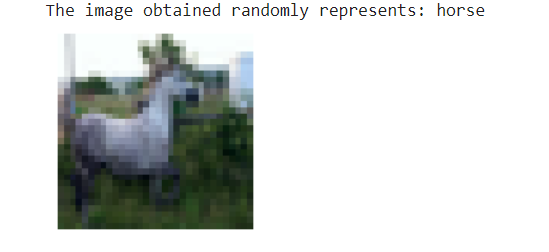

The code below displays 8 random samples from each class in the test dataset.

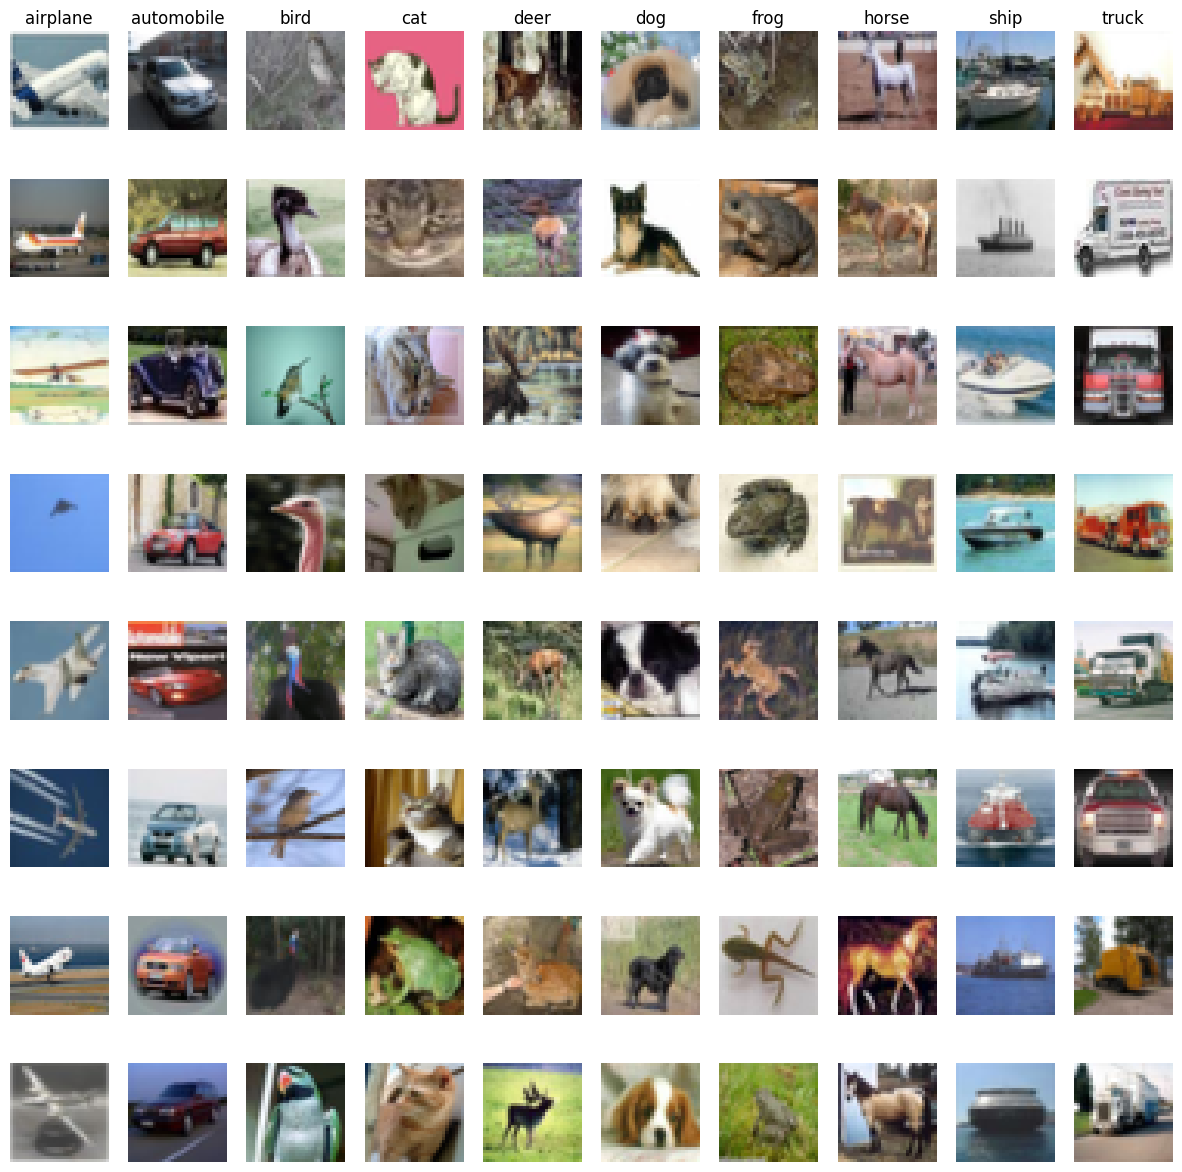

In [ ]:
def plot_cifar10_grid(): #Function definition to plot the images
    classes = test_loader.dataset.classes #Create a variable that contains all the classes in the dataset
    total_samples = 8 #Set a number of samples
    plt.figure(figsize=(2, 2)) #Set a specific image size
    for label, sample in enumerate(classes): #This loop iterates through the labels based on the quantity of classes and takes the number of samples into consideration
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets)) #Index from the dataset's targets
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False) #Variable creation with a random sample
        for i, idx in enumerate(sample_idxs): #Nested loop that considers the index from the enumerated samples
            plt_idx = i*len(classes) + label + 1 #The index is multiplied by the number of classes, and then one is added to the label index
            plt.subplot(total_samples, len(classes), plt_idx) #Subplot definition based on the classes, samples and the index
            plt.imshow(test_loader.dataset.data[idx]) #Based on the loop, display the indexed image
            plt.axis('off') #Set the axis off

            if i == 0: plt.title(sample) #Logic condition based on the 'i' index from a nested loop
    plt.show()

plot_cifar10_grid()

### Calculate accuracy

This function is to calculate acurracy using the pythorch.

The torch.no_grad is to desactivate the gradient calculation for the evaluation.


In [ ]:
def accuracy(model, loader): #Function definition to calculate the model's accuracy
    num_correct = 0
    num_total = 0
    model.eval() #Set the model into evaluation mode
    model = model.to(device=device) #Set the selected device
    with torch.no_grad(): #We exclude the gradient
        for xi, yi in loader:
            xi = xi.to(device=device, dtype = torch.float32) #Variable is charged in the memory
            yi = yi.to(device=device, dtype = torch.long) #Variable is charged in the memory
            scores = model(xi) #Data is passed to calculate its score
            _, pred = scores.max(dim=1) #Scores is a Torch tensor, just index is storaged for each column
            num_correct += (pred == yi).sum() #The variable increases its size when pred==yi
            num_total += pred.size(0) #Size is used instead of shape because we are working with a tensor
        return float(num_correct)/num_total #Calculates the score and converts to float

### Train loop

The train loop is similar as the activity 1, but the difference is that we use the pythorch tensors and reduce the complexity because the tensors were already sectioned in 78 batches of 64 images and 1 batch of 8.

The inputs and labels are loaded to device (if gpu is available these were loaded to gpu memory)
.

In [ ]:
def train(model, optimiser, epochs=100):
    model = model.to(device=device)
    for epoch in range(epochs):
        for i, (xi, yi) in enumerate(train_loader):
            model.train()
            xi = xi.to(device=device, dtype=torch.float32) #input
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)
            cost = F.cross_entropy(input= scores, target=yi)
            optimiser.zero_grad()
            cost.backward()
            optimiser.step()
        acc = accuracy(model, val_loader)
        print(f'Epoch: {epoch}, costo: {cost.item()}, accuracy: {acc},')

### Linear model

In [ ]:
# To do: Use PyTorch to create a linear model to have an initial baseline model

The following code represent a deep neural network as follow:

1 Input layer (32x32x3) = 3072

2 Hidden Layers of 256 neurons hidden.

1Output layer of 10 neurons to show the class predicted.

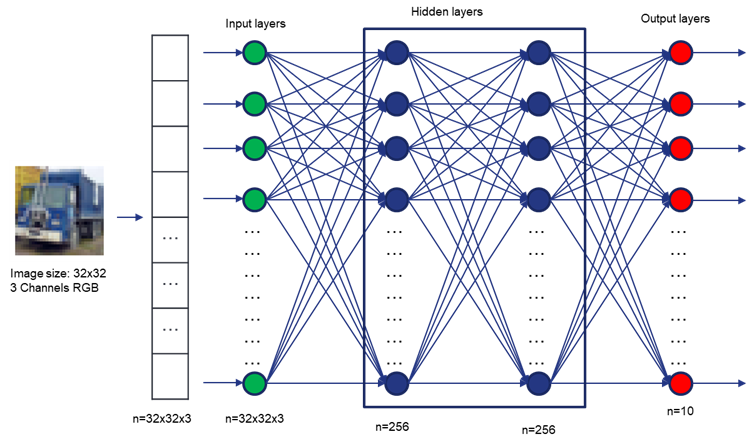

In [ ]:
hidden1 = 256
hidden = 256
lr = 0.001
epochs = 12
model1 = nn.Sequential(nn.Flatten(),
                       nn.Linear(in_features=32*32*3, out_features=hidden1), nn.ReLU(),
                       nn.Linear(in_features=hidden1, out_features=hidden), nn.ReLU(),
                       nn.Linear(in_features=hidden, out_features=10))
optimiser = torch.optim.Adam(model1.parameters(), lr=lr)

In [ ]:
train(model1, optimiser, epochs)

Epoch: 0, costo: 1.4729363918304443, accuracy: 0.478,
Epoch: 1, costo: 1.1239266395568848, accuracy: 0.502,
Epoch: 2, costo: 1.1784454584121704, accuracy: 0.5158,
Epoch: 3, costo: 1.057612657546997, accuracy: 0.5264,
Epoch: 4, costo: 1.096288800239563, accuracy: 0.5174,
Epoch: 5, costo: 1.5816839933395386, accuracy: 0.53,
Epoch: 6, costo: 1.2249622344970703, accuracy: 0.5346,
Epoch: 7, costo: 0.7537176012992859, accuracy: 0.5414,
Epoch: 8, costo: 1.085472583770752, accuracy: 0.5332,
Epoch: 9, costo: 0.5574837327003479, accuracy: 0.531,
Epoch: 10, costo: 0.6760449409484863, accuracy: 0.5348,
Epoch: 11, costo: 0.880486786365509, accuracy: 0.5284,


The train shows with 10 iterations a maximum accuracy of 52% with a cost of 1.55.

In [ ]:
accuracy(model1, test_loader)

0.5136

The acurracy using test_loader shows a 51%.

### Sequential CNN

In [ ]:
# To do: Use PyTorch to implement a CNN model, accuracy should be better than
#the linear model

The following code represent Convolutional neural netwrork (CNN) as follows:

1- Convolution +ReLu() with 16 kernels, kernel size =3*3, padding=1 and strike = 1

2- Convolution +ReLu() with 16 kernels, kernel size =3*3, padding=1 and strike = 1 and maxpooling (2,2) with strike 2 to reduce the output to middle for the flatten.

3- Flatten layer to flat the hypermatrices into vector.

4- Fully connected linear layer with the quantity of neuros 16x16x32 =8,192.

5- output layer with 10 neurons to show the classes to classify.



This image represents the CNN architecture:

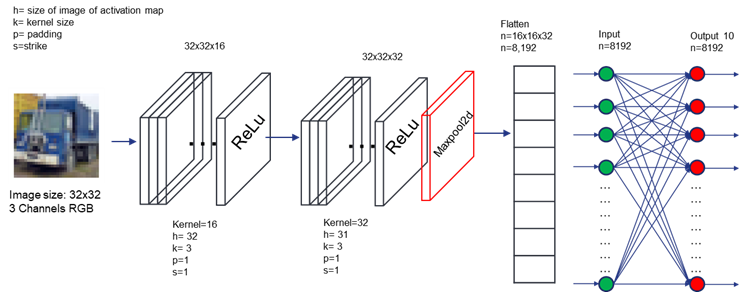

In [ ]:
channel1 = 16
channel2 = 32
epochs = 12
lr = 0.0005
modelCNN1 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=channel1,
                                   kernel_size=3, padding=1),
                                                    nn.ReLU(),
                          nn.Conv2d(in_channels=channel1, out_channels=channel2,
                                    kernel_size= 3, padding=1),
                          nn.ReLU(),
                          nn.MaxPool2d(2, 2),
                          nn.Flatten(),
                          nn.Linear(in_features=16*16*channel2, out_features=10)
                                   )
optimiser = torch.optim.Adam(modelCNN1.parameters(), lr)

In [ ]:
modelCNN1

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Flatten(start_dim=1, end_dim=-1)
  (6): Linear(in_features=8192, out_features=10, bias=True)
)

In [ ]:
train(modelCNN1, optimiser, epochs)

Epoch: 0, costo: 0.9688173532485962, accuracy: 0.5964,
Epoch: 1, costo: 1.357251524925232, accuracy: 0.6378,
Epoch: 2, costo: 0.9830280542373657, accuracy: 0.6572,
Epoch: 3, costo: 1.205962896347046, accuracy: 0.6768,
Epoch: 4, costo: 1.0527427196502686, accuracy: 0.6716,
Epoch: 5, costo: 0.9595789909362793, accuracy: 0.6814,
Epoch: 6, costo: 0.8287174701690674, accuracy: 0.6752,
Epoch: 7, costo: 0.41509440541267395, accuracy: 0.6762,
Epoch: 8, costo: 1.1839226484298706, accuracy: 0.6826,
Epoch: 9, costo: 0.3175286650657654, accuracy: 0.686,
Epoch: 10, costo: 0.6398879885673523, accuracy: 0.6866,
Epoch: 11, costo: 0.34959012269973755, accuracy: 0.6786,


The train shows with 12 iterations a maximum accuracy of 67% with a cost of 0.34  the results of CNN model shows better result than linear model.

In [ ]:
accuracy(modelCNN1, test_loader)

0.6592

The acurracy using test_loader shows a 65% with CNN model.

##**Conclusions:**

####Based on the provided results from two different neural network models, the linear model and a convolutional neural network (CNN), we were able to conclude the following:

###Linear Model

####**Consistency:** The linear model displays some consistency in learning but does fluctuate, especially in the accuracy, which moved between 47.8% and 54.14%.

####**Learning Rate: **The learning rate (lr = 0.001) might be adjusted to experiment with the model's ability to converge more smoothly, as the cost does not decrease consistently across epochs.

####**Overfitting:** There's a possibility of overfitting as the model is quite large for a potentially simple task, and there are signs of unstable learning in terms of cost fluctuation.

####**Potential Improvement:** Utilizing dropout layers or other regularization techniques might assist in achieving more consistent learning and potentially better generalization to unseen data.

###Convolutional Neural Network (CNN)

####**Performance:** The CNN model outperforms the linear model in terms of accuracy throughout the training. This aligns with the general understanding that CNNs can be more adept at handling image data due to their spatial hierarchies.

####**Cost Fluctuations:** Similar to the linear model, the CNN also exhibits notable fluctuations in cost across epochs, which may indicate a learning instability or potential overfitting.

####**Learning Rate Adjustment:** An adjustment in the learning rate (lr = 0.0005) might also benefit the CNN model, even though it performs better compared to the linear model. An adaptive learning rate or implementing learning rate schedules could be considered.

####**Optimization:** Further tuning in the architecture, such as experimenting with different kernel sizes, adding more convolutional layers, or utilizing batch normalization might help the model learn better representations.

####**Accuracy vs. Cost:** In some epochs, there is a discrepancy between the behavior of cost and accuracy (e.g., cost increases while accuracy also increases), indicating that the model might be fitting to noise or certain particularities of the training data.

####Finally, while the CNN model demonstrates better performance in accuracy, both models indicate a need for further optimization and tuning to enhance stability in learning and generalization to unseen data. Future steps should involve a deeper investigation into alternative architectures, learning rates, and regularization methods, aiming to improve the robustness and predictive capabilities of the models.

## **References**:

* Ioffe, S. & Szehedy, C. (2015). Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate ShiftLinks to an external site.

* He, K., Zhang, X., Ren, S. & Sun, J. (2015). Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification

* [Pepe Cantoral, Ph.D.]. (2021, Jul 6). ¡Red Neuronal usando PyTorch! PyTorch tutorialLinks to an external site.  [Video File]. YouTube

* [Pepe Cantoral, Ph-D.]. (2021, March 19).Backpropagation - Gradient Descent, Ejemplo completo –Fundamentos de Deep Learning – (Parte 9)Links to an external site. [Video File]. YouTube.

* [Pepe Cantoral, Ph-D.]. (2021, March 27). Funciones de Activación – Fundamentos de Deep Learning – (Parte 10)  [Video File]Links to an external site.. [Video File]. YouTube.
* [Pepe Cantoral, Ph-D.]. (2021, March 31). Redes Neuronales Multi-Capa / Deep Neural Networks – Fundamentos de Deep Learning -(Teoría parte 11)Links to an external site. [Video File]. YouTube.
* [Pepe Cantoral, Ph-D.]. (2021, May 15). ¡Red Neuronal Desde Cero estilo FRAMEWORK de DEEP LEARNING!Links to an external site.[Video File]. YouTube.
* [Pepe Cantoral, Ph-D.]. (2021, May 18). ¡Red Neuronal Desde Cero estilo FRAMEWORK de DEEP LEARNING - Parte 2!Links to an external site. [Video File]. YouTube.
* [Pepe Cantoral, Ph-D.]. (2021, December 11). Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 1Links to an external site. [Video File]. YouTube.
* [Pepe Cantoral, Ph-D.]. (2021, December 13). Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 2Links to an external site. [Video File]. YouTube.
* [Pepe Cantoral, Ph-D.]. (2021, December 17). Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 3Links to an external site. [Video File]. YouTube.
* [Pepe Cantoral, Ph-D.]. (2021, December 17). Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 4Links to an external site. [Video File]. YouTube.